In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Linear SVC Assignment

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

### Import the admissions data set (admissions.csv).

In [3]:
data = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv"
)
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


<IPython.core.display.Javascript object>

### Split the data into training and test sets, with the test set comprising 30% of the data.  Use `'Admitted'` as the target.

In [4]:
X = data.drop(columns="Admitted")
y = data["Admitted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<IPython.core.display.Javascript object>

In [5]:
data["SOP"].value_counts()

3.5    70
4.0    70
3.0    64
4.5    53
2.5    47
5.0    37
2.0    33
1.5    20
1.0     6
Name: SOP, dtype: int64

<IPython.core.display.Javascript object>

### Generate an SVC model with a linear kernel. Set the regularization parameter (C) = 10. Check the score for both train and test sets. 

In [6]:
num_cols = ["GRE", "TOEFL", "SOP", "LOR", "SchoolRank"]

bin_cols = ["Research"]

<IPython.core.display.Javascript object>

In [7]:
preprocessing = ColumnTransformer(
    [("scale", StandardScaler(), num_cols)], remainder="passthrough"
)

<IPython.core.display.Javascript object>

In [8]:
pipeline = Pipeline(
    [("preprocessing", preprocessing), ("svm", SVC(C=10, kernel="linear"))]
)

<IPython.core.display.Javascript object>

In [9]:
model = pipeline.fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [10]:
model.score(X_train, y_train)

0.8714285714285714

<IPython.core.display.Javascript object>

In [11]:
model.score(X_test, y_test)

0.8666666666666667

<IPython.core.display.Javascript object>

### Choose some other values for C and show the difference between the scores for the train and test sets.

In [12]:
Cs = [0.001, 0.01, 0.1, 1.0, 10, 100, 1000, 10000]
train_scores = []
test_scores = []
for c in Cs:
    pipeline2 = Pipeline(
        [("preprocessing", preprocessing), ("svm", SVC(C=c, kernel="linear"))]
    )
    print("C is: {}".format(c))
    model = pipeline2.fit(X_train, y_train)
    print("Train score is {}".format(model.score(X_train, y_train)))
    train_scores.append(model.score(X_train, y_train))
    print("Test Score is {}".format(model.score(X_test, y_test)))
    test_scores.append(model.score(X_test, y_test))


C is: 0.001
Train score is 0.6892857142857143
Test Score is 0.7083333333333334
C is: 0.01
Train score is 0.8357142857142857
Test Score is 0.8416666666666667
C is: 0.1
Train score is 0.8607142857142858
Test Score is 0.8333333333333334
C is: 1.0
Train score is 0.8821428571428571
Test Score is 0.8583333333333333
C is: 10
Train score is 0.8714285714285714
Test Score is 0.8666666666666667
C is: 100
Train score is 0.875
Test Score is 0.8666666666666667
C is: 1000
Train score is 0.8714285714285714
Test Score is 0.8666666666666667
C is: 10000
Train score is 0.8785714285714286
Test Score is 0.8666666666666667


<IPython.core.display.Javascript object>

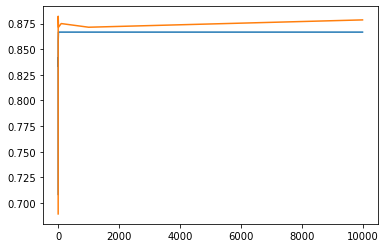

<IPython.core.display.Javascript object>

In [13]:
plt.plot(Cs, test_scores)
plt.plot(Cs, train_scores)

### What if we switched up the target variable? Let assume that we know whether a student was admitted. Let's try to predict what their SchoolRank was. 

Create an SVC model with a linear kernel with the SchoolRank field as the target variable. Report both the train and the test scores.

In [14]:
data["SchoolRank"].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: SchoolRank, dtype: int64

<IPython.core.display.Javascript object>

In [19]:
X = data.drop(columns="SchoolRank")
y = data["SchoolRank"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

num_cols = ["GRE", "TOEFL", "SOP", "LOR"]
bin_cols = ["Research", "Admitted"]

<IPython.core.display.Javascript object>

In [20]:
model = pipeline.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

<IPython.core.display.Javascript object>

In [ ]:
print("Train score is {}".format(model.score(X_train, y_train)))
print("Test Score is {}".format(model.score(X_test, y_test)))

### Show confusion matrices for the training and test sets, and a classification report for the test set. What trends do you notice?

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))